## Visualize the Feature Maps

* Present a single image
* Examine the response at different convolutional layers   

In [1]:

# Load pickled data
from matplotlib import pyplot as plt
import numpy as np
import pickle

import tensorflow as tf


#dont forget to run: source activate carnd-term1  if tensorflow doesn't exist

batch_size = 128

testing_file = './test.p'

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    

X_test, y_test = test['features'], test['labels']
n_classes = len(np.unique(y_test))

In [2]:
##return the activation maps for visualization
##remember that the layers must be named (e.g., name='conv1')

def return_activation(layer, presentation_image):
    neural_activations = sess.run(layer, 
                                  feed_dict={"x:0": presentation_image,
                                             "keep_prob:0": 1.0})
    print(np.shape(neural_activations))
    
    n_feature_maps = np.shape(neural_activations)[3]
    
    for map in range(n_feature_maps):
       plt.imshow(neural_activations[0,:,:,map])
       plt.show()


INFO:tensorflow:Restoring parameters from ./model_final


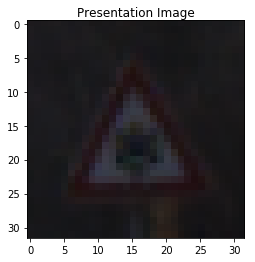

(1, 16, 16, 32)


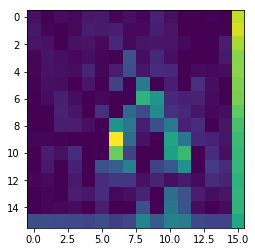

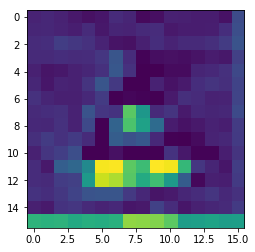

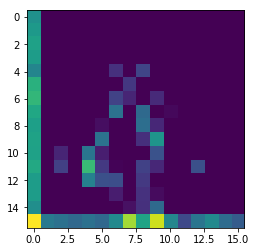

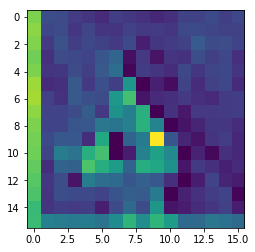

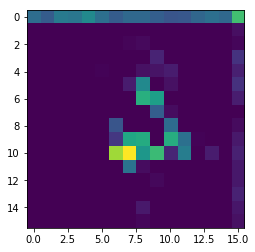

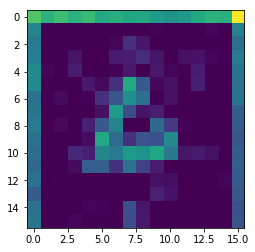

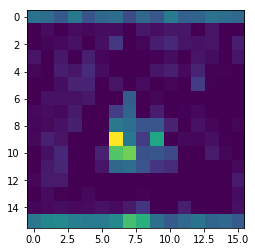

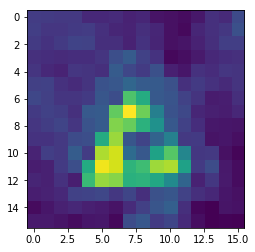

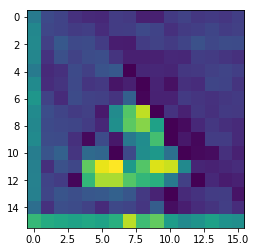

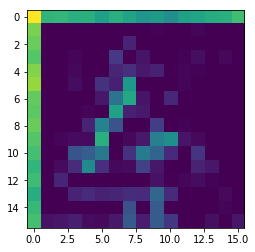

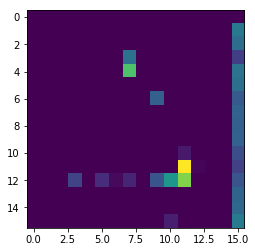

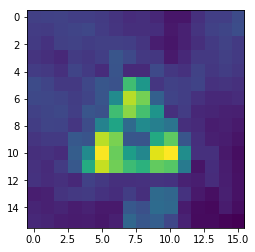

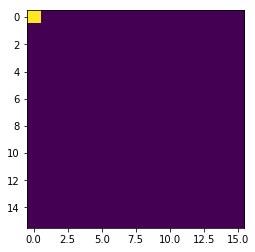

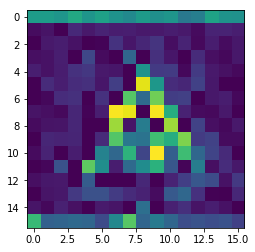

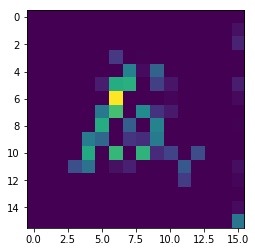

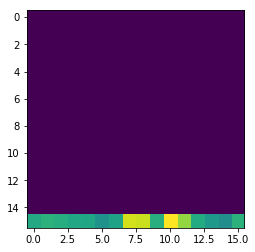

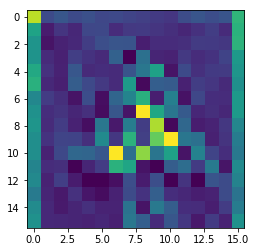

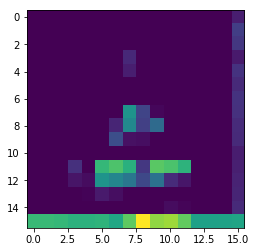

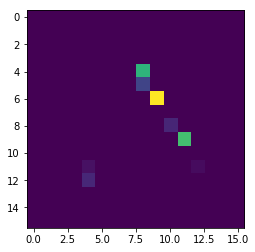

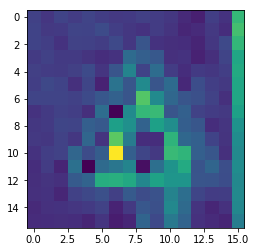

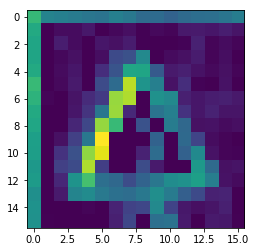

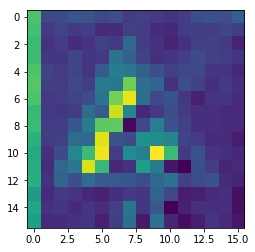

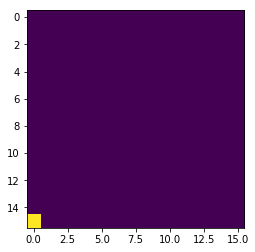

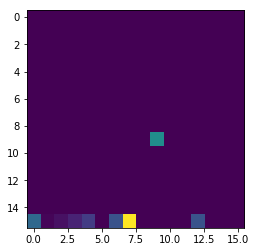

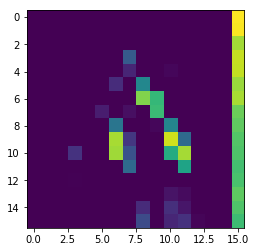

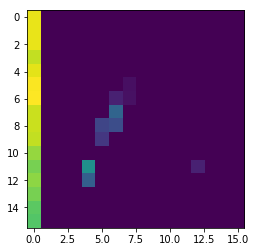

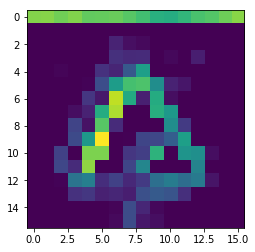

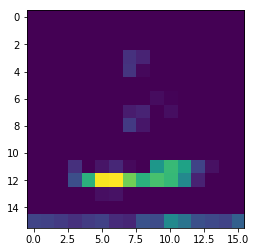

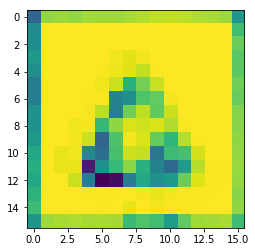

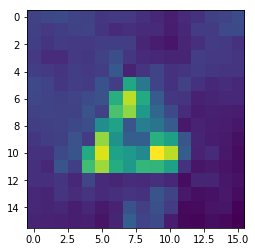

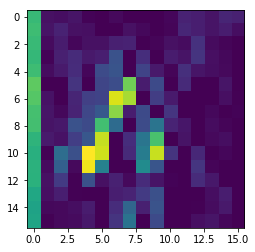

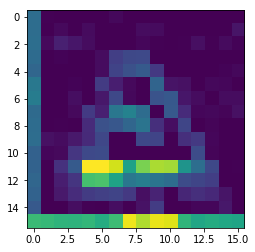

In [8]:

import tensorflow as tf
import numpy as np
import random
from matplotlib import pyplot as plt

tf.reset_default_graph()

graph = tf.get_default_graph()
#init = tf.global_variables_initializer()
saver = tf.train.import_meta_graph('./model_final.meta') 

with tf.Session() as sess:

    saver.restore(sess,tf.train.latest_checkpoint('./'))
    im_number = random.randint(0,100)
    plt.imshow(X_test[im_number,:,:,:])
    plt.title("Presentation Image")
    plt.show()
    ##return the layer of interest (conv1-5)
    ##using conv1 with 32 filters
    c1 = graph.get_tensor_by_name("conv1:0")
    
    testvec = np.zeros([1,32,32,3])
    testvec[0,:,:,:] = X_test[im_number,:,:,:]
       
    return_activation(c1, testvec)

  